In [1]:
#!pip install -U scikit-learn
#!pip install gensim

In [2]:
import numpy as np # linear algebra
import re, os
import string
import pandas as pd
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud ,STOPWORDS
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from nltk.tokenize import word_tokenize 
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from sklearn.svm import SVC
from gensim.parsing.preprocessing import STOPWORDS
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('Resume.csv')

In [4]:
# drop not using columns
df.drop(columns = ['ID', 'Resume_html'], inplace = True)

In [5]:
# create list of all categories
categories = np.sort(df['Category'].unique())

In [6]:
df['length_str'] = df['Resume_str'].str.len()

In [7]:
df['length_str'].describe()

count     2484.000000
mean      6295.308776
std       2769.251458
min         21.000000
25%       5160.000000
50%       5886.500000
75%       7227.250000
max      38842.000000
Name: length_str, dtype: float64

In [10]:
#Feature Engineering

"""  La fonction clean_text(text) nettoie le texte en le passant en minuscules, en remplaçant certains symboles par 
    des espaces et en supprimant d'autres symboles. Elle supprime également les stopwords.

    Nettoie le texte en supprimant les URL, les hashtags, les mentions et les ponctuations. 
    Elle remplace également les caractères non-ASCII par des espaces et supprime les espaces supplémentaires.

    Nettoie le texte en supprimant les caractères non anglais, la ponctuation et les nombres. 
    Elle tokenise ensuite le texte, supprime les stopwords, lemmatize les mots et renvoie le texte nettoyé sous forme de chaîne 
    de caractères  """

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
   
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    
    text = re.sub('http\S+\s*', ' ', text)  # remove URLs
    text = re.sub('RT|cc', ' ', text)  # remove RT and cc
    text = re.sub('#\S+', '', text)  # remove hashtags
    text = re.sub('@\S+', '  ', text)  # remove mentions
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)  # remove punctuations
    text = re.sub(r'[^\x00-\x7f]',r' ', text) #remplacer tous les caractères non ASCII
    text = re.sub('\s+', ' ', text)  # remove extra whitespace
    
    # remove non-english characters, punctuation and numbers
    text = re.sub('[^a-zA-Z]', ' ', text) 
    # tokenize word
    text = nltk.tokenize.word_tokenize(text) 
    # remove stop words
    text = [w for w in text if not w in nltk.corpus.stopwords.words('english')]
    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(text) for text in text]

    return ' '.join(text)

In [32]:
df['Resume_Clean'] = df['Resume_str'].apply(clean_text)
df['Resume_Clean'] = df['Resume_Clean'].str.replace('\d+', '')

In [33]:
df['length_Clean'] = df['Resume_Clean'].str.len()

In [34]:
df['length_Clean'].describe()

count     2484.000000
mean      4584.564815
std       2090.817589
min          0.000000
25%       3711.000000
50%       4291.000000
75%       5318.000000
max      27067.000000
Name: length_Clean, dtype: float64

In [35]:
from sklearn.feature_extraction import text
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = text.ENGLISH_STOP_WORDS.union( ['state', 'city',
     'company', 'name', 'skill'])

def filter_text(text):
    
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text

In [36]:
df['Resume_filtered'] = df['Resume_Clean'].apply(lambda w: clean_text(w))

In [38]:
df['length_filtered'] = df['Resume_filtered'].str.len()

In [40]:
df['length_filtered'].describe()

count     2484.000000
mean      4544.461353
std       2077.131373
min          0.000000
25%       3676.500000
50%       4253.500000
75%       5281.000000
max      27005.000000
Name: length_filtered, dtype: float64

Text(0.5, 1.0, 'Word Cloud of Resumes')

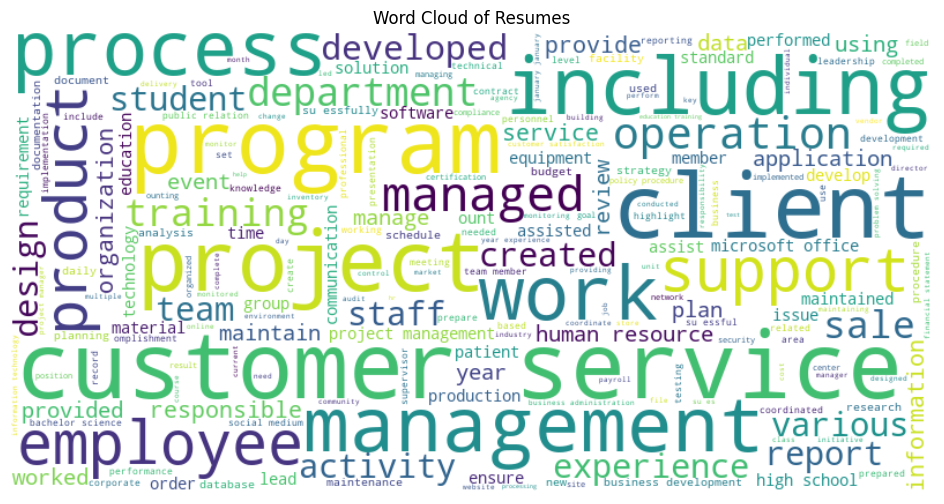

In [41]:
# Create a word cloud of the 'Resume_filtered' column
from wordcloud import WordCloud
skills = ' '.join(df['Resume_filtered'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(skills)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Resumes')

In [43]:
print("\n__________\nRow 0 - Category : ", df.iloc[5].Category)
print("\n__________\nRow 0 - Resume_filtered : ", df.iloc[5].Resume_filtered)


__________
Row 0 - Category :  HR

__________
Row 0 - Resume_filtered :  hr generalist summary dedicated focused administrative assistant excels prioritizing completing multiple task simultaneously following achieve project goal seeking role increased responsibility authority highlight microsoft office proficiency excel spreadsheet meticulous attention resultsoriented selfdirected time management professional mature selfstarter legal administrative support experience hr generalist managed visa related employment process nonimmigrant faculty staff improved productivity enhanced visa related service improved operational structure developing guideline tool internal external administration nonimmigrant employment procedure reduced internal employment authorization processing time approximately percent prepared reviewed submitted petition uscis adjudication maintained electronic database petition filed served university point contact uscis developed presented university guideline adhere ma

In [44]:
#Encode the labels into numeric
def set_code(row):
    if row["Category"] == "ACCOUNTANT":
        return 1
    elif row["Category"] == "ADVOCATE":
        return 2
    elif row["Category"] == "AGRICULTURE":
        return 3
    elif row["Category"] == "APPAREL":
        return 4
    elif row["Category"] == "ARTS":
        return 5
    elif row["Category"] == "AUTOMOBILE":
        return 6
    elif row["Category"] == "AVIATION":
        return 7
    elif row["Category"] == "BANKING":
        return 8
    elif row["Category"] == "BPO":
        return 9
    elif row["Category"] == "BUSINESS-DEVELOPMENT":
        return 10
    elif row["Category"] == "CHEF":
        return 11
    elif row["Category"] == "CONSTRUCTION":
        return 12
    elif row["Category"] == "CONSULTANT":
        return 13
    elif row["Category"] == "DESIGNER":
        return 14
    elif row["Category"] == "DIGITAL-MEDIA":
        return 15
    elif row["Category"] == "ENGINEERING":
        return 16
    elif row["Category"] == "FINANCE":
        return 17
    elif row["Category"] == "HEALTHCARE":
        return 18
    elif row["Category"] == "HR":
        return 19
    elif row["Category"] == "INFORMATION-TECHNOLOGY":
        return 20
    elif row["Category"] == "PUBLIC-RELATIONS":
        return 21
    elif row["Category"] == "SALES":
        return 22
    elif row["Category"] == "TEACHER":
        return 23
    else:
        return 24

df = df.assign(target=df.apply(set_code, axis=1))

In [45]:
def upsample_classes(data, target):
    
    lst = list(data[target].unique())
    
    classes = []
    for c in lst:
        classes.append(data[data[target]==c])
    
    length = 0
    class_lab = None
    for c in classes:
        if len(c)>length:
            length=len(c)
            class_lab = c
    class_lab = class_lab[target].unique()[0]
    
    regroup = pd.concat(classes)
    maj_class = regroup[regroup[target]==class_lab]

    lst.remove(class_lab)
    
    new_classes=[]
    for i in lst:
        new_classes.append(resample(data[data[target]==i],replace=True, n_samples=len(maj_class)))

    minority_classes = pd.concat(new_classes)
    upsample = pd.concat([regroup[regroup[target]==class_lab],minority_classes])

    return upsample

In [46]:
from sklearn.utils import resample
df_balanced = (upsample_classes(df,'target'))

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_balanced['Resume_filtered'], df_balanced['target'], test_size = 0.2, random_state=8)

In [36]:
#Tfidf

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

In [53]:
Text= df_balanced['Resume_filtered'].values
Target= df_balanced['target'].values

In [54]:
word_vectorizer = TfidfVectorizer(sublinear_tf=True, stop_words='english')
word_vectorizer.fit(Text)
WordFeatures= word_vectorizer.transform(Text)

In [55]:
WordFeatures.shape

(2880, 36269)

In [56]:
X_train,X_test,y_train,y_test= train_test_split(WordFeatures, Target, random_state=42)

In [57]:
print(X_train.shape)
print(X_test.shape)

(2160, 36269)
(720, 36269)


In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

In [59]:
models = {
    'K-Nearest Neighbors' : KNeighborsClassifier(),
    'Logistic Regression' : LogisticRegression(),
    'Support Vector Machine' : SVC(),
    'Random Forest' : RandomForestClassifier(),
    'GradientBoostingClassifier' : GradientBoostingClassifier(),
    'MultinomialNB' : MultinomialNB(),
    'DecisionTreeClassifier' : DecisionTreeClassifier()
}

In [60]:
model_list=[]
for model in models.values():
    model_list.append(OneVsRestClassifier(model))
model_list

[OneVsRestClassifier(estimator=KNeighborsClassifier()),
 OneVsRestClassifier(estimator=LogisticRegression()),
 OneVsRestClassifier(estimator=SVC()),
 OneVsRestClassifier(estimator=RandomForestClassifier()),
 OneVsRestClassifier(estimator=GradientBoostingClassifier()),
 OneVsRestClassifier(estimator=MultinomialNB()),
 OneVsRestClassifier(estimator=DecisionTreeClassifier())]

In [61]:
for i in model_list:
    i.fit(X_train, y_train)
    print(f'{i} trained')

print("*"*60)
print("all models trained")

OneVsRestClassifier(estimator=KNeighborsClassifier()) trained
OneVsRestClassifier(estimator=LogisticRegression()) trained
OneVsRestClassifier(estimator=SVC()) trained
OneVsRestClassifier(estimator=RandomForestClassifier()) trained
OneVsRestClassifier(estimator=GradientBoostingClassifier()) trained
OneVsRestClassifier(estimator=MultinomialNB()) trained
OneVsRestClassifier(estimator=DecisionTreeClassifier()) trained
************************************************************
all models trained


In [62]:
for count, value in enumerate(model_list):
    print(f"Accuracy of {value} on training set :", model_list[count].score(X_train, y_train))
    print(f"Accuracy of {value} on test set :", model_list[count].score(X_test, y_test))
    print("*"*100)

print("all scores calculated")

Accuracy of OneVsRestClassifier(estimator=KNeighborsClassifier()) on training set : 0.7657407407407407
Accuracy of OneVsRestClassifier(estimator=KNeighborsClassifier()) on test set : 0.5944444444444444
****************************************************************************************************
Accuracy of OneVsRestClassifier(estimator=LogisticRegression()) on training set : 0.9291666666666667
Accuracy of OneVsRestClassifier(estimator=LogisticRegression()) on test set : 0.7722222222222223
****************************************************************************************************
Accuracy of OneVsRestClassifier(estimator=SVC()) on training set : 1.0
Accuracy of OneVsRestClassifier(estimator=SVC()) on test set : 0.8388888888888889
****************************************************************************************************
Accuracy of OneVsRestClassifier(estimator=RandomForestClassifier()) on training set : 1.0
Accuracy of OneVsRestClassifier(estimator=RandomForest

In [105]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# models à  entraîner
models = [
    
    {
        'name': 'SVC',
        'model': SVC(),
        'params': {
            'C': [4, 5, 6],
            'kernel': ['linear', 'rbf']
        }
    },
    {
        'name': 'RandomForestClassifier',
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [400, 350, 300],
            'max_depth': [None, 5]
        }
    },
    {
        'name': 'LogisticRegression',
        'model': OneVsRestClassifier(LogisticRegression()),
        'params': {
            'estimator__C': [4, 5, 6],
            'estimator__penalty': ['l1', 'l2']
        }
    },
     {
        'name': 'GradientBoostingClassifier',
        'model': OneVsRestClassifier(GradientBoostingClassifier()),
        'params': {
            'estimator__learning_rate': [0.15, 0.05],
            'estimator__n_estimators': [50, 100],
            'estimator__max_depth': [3, 5]
        }
    }
]

# Parcourez la liste des modèles et entraînez-les avec différents hyperparamètres
for model in models:
    print(f"Training {model['name']}...")
    clf = GridSearchCV(model['model'], model['params'], cv=2)
    clf.fit(X_train,y_train)
    print(f"Best parameters for {model['name']}: {clf.best_params_}")

Training SVC...
Best parameters for SVC: {'C': 4, 'kernel': 'linear'}
Training RandomForestClassifier...
Best parameters for RandomForestClassifier: {'max_depth': None, 'n_estimators': 350}
Training LogisticRegression...
Best parameters for LogisticRegression: {'estimator__C': 6, 'estimator__penalty': 'l2'}
Training GradientBoostingClassifier...
Best parameters for GradientBoostingClassifier: {'estimator__learning_rate': 0.05, 'estimator__max_depth': 3, 'estimator__n_estimators': 100}


In [64]:
# Classifier - Algorithm - SVM
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn import svm
# fit the training dataset on the classifier
SVM = OneVsRestClassifier(svm.SVC(C=4.0, kernel='linear', degree=3, gamma='auto'))
SVM.fit(X_train,y_train)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(X_test)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, y_test)*100)

SVM Accuracy Score ->  85.41666666666666


In [66]:
# Classifier - Algorithm - GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Initialiser le modèle
gb = OneVsRestClassifier(GradientBoostingClassifier())

# Spécifier les paramètres à tester avec GridSearchCV
params = {
    'estimator__learning_rate': [0.05],
    'estimator__max_depth': [3],
    'estimator__n_estimators': [100]
}

# Initialiser GridSearchCV
clf = GridSearchCV(gb, params, cv=2)

# Entraîner le modèle
clf.fit(X_train, y_train)

# Faire des prédictions sur les données de validation
y_pred = clf.predict(X_test)

# Calculer l'accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("GradientBoostingClassifier Accuracy Score -> ", accuracy * 100)

GradientBoostingClassifier Accuracy Score: 0.8736111111111111
GradientBoostingClassifier Accuracy Score ->  87.36111111111111


In [67]:
# Classifier - Algorithm - RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

# Create a Random Forest Classifier
RF = RandomForestClassifier(max_depth=None, n_estimators=350)

# Create an instance of the OneVsRestClassifier with the Random Forest Classifier
ovr_RF = OneVsRestClassifier(RF)

# Fit the training dataset on the classifier
ovr_RF.fit(X_train, y_train)

# Predict the labels on the validation dataset
predictions_RF = ovr_RF.predict(X_test)

# Use accuracy_score function to get the accuracy
print("Random Forest Accuracy Score -> ", accuracy_score(predictions_RF, y_test) * 100)

Random Forest Accuracy Score ->  83.88888888888889


In [ ]:
# vectorize text data BOW

In [68]:
# vectorize text data
X_train, X_test, y_train, y_test = train_test_split(df_balanced['Resume_filtered'], df_balanced['target'], test_size = 0.2, random_state=8)
vectorizer = CountVectorizer()
conuntvectorizer_train = vectorizer.fit_transform(X_train).astype(float)
conuntvectorizer_test = vectorizer.transform(X_test).astype(float)

In [69]:
print(conuntvectorizer_train.shape)
print(conuntvectorizer_test.shape)

(2304, 33610)
(576, 33610)


In [70]:
for i in model_list:
    i.fit(conuntvectorizer_train, y_train)
    print(f'{i} trained')

print("*"*60)
print("all models trained")

OneVsRestClassifier(estimator=KNeighborsClassifier()) trained
OneVsRestClassifier(estimator=LogisticRegression()) trained
OneVsRestClassifier(estimator=SVC()) trained
OneVsRestClassifier(estimator=RandomForestClassifier()) trained
OneVsRestClassifier(estimator=GradientBoostingClassifier()) trained
OneVsRestClassifier(estimator=MultinomialNB()) trained
OneVsRestClassifier(estimator=DecisionTreeClassifier()) trained
************************************************************
all models trained


In [71]:
for count, value in enumerate(model_list):
    print(f"Accuracy of {value} on training set :", model_list[count].score(conuntvectorizer_train, y_train))
    print(f"Accuracy of {value} on test set :", model_list[count].score(conuntvectorizer_test, y_test))
    print("*"*100)

print("all scores calculated")

Accuracy of OneVsRestClassifier(estimator=KNeighborsClassifier()) on training set : 0.7139756944444444
Accuracy of OneVsRestClassifier(estimator=KNeighborsClassifier()) on test set : 0.5659722222222222
****************************************************************************************************
Accuracy of OneVsRestClassifier(estimator=LogisticRegression()) on training set : 1.0
Accuracy of OneVsRestClassifier(estimator=LogisticRegression()) on test set : 0.8506944444444444
****************************************************************************************************
Accuracy of OneVsRestClassifier(estimator=SVC()) on training set : 0.9887152777777778
Accuracy of OneVsRestClassifier(estimator=SVC()) on test set : 0.8315972222222222
****************************************************************************************************
Accuracy of OneVsRestClassifier(estimator=RandomForestClassifier()) on training set : 1.0
Accuracy of OneVsRestClassifier(estimator=RandomForest

In [108]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# models à  entraîner
models = [
    
    {
        'name': 'SVC',
        'model': SVC(),
        'params': {
            'C': [4, 5, 6],
            'kernel': ['linear', 'rbf']
        }
    },
    {
        'name': 'RandomForestClassifier',
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [400, 350, 300],
            'max_depth': [None, 5]
        }}
]

# Parcourez la liste des modèles et entraînez-les avec différents hyperparamètres
for model in models:
    print(f"Training {model['name']}...")
    clf = GridSearchCV(model['model'], model['params'], cv=2)
    clf.fit(conuntvectorizer_train,y_train)
    print(f"Best parameters for {model['name']}: {clf.best_params_}")

Training SVC...
Best parameters for SVC: {'C': 4, 'kernel': 'linear'}
Training RandomForestClassifier...
Best parameters for RandomForestClassifier: {'max_depth': None, 'n_estimators': 350}


In [109]:
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


# liste des modèles que vous souhaitez entraîner
models = [
    
    {
        'name': 'GradientBoostingClassifier',
        'model': OneVsRestClassifier(GradientBoostingClassifier()),
        'params': {
            'estimator__learning_rate': [0.15, 0.05],
            'estimator__n_estimators': [50, 100],
            'estimator__max_depth': [3, 5]
        }
    }
]

# Parcourez la liste des modèles et entraînez-les avec différents hyperparamètres
for model in models:
    print(f"Training {model['name']}...")
    clf = GridSearchCV(model['model'], model['params'], cv=2)
    clf.fit(conuntvectorizer_train,y_train)
    print(f"Best parameters for {model['name']}: {clf.best_params_}")

Training GradientBoostingClassifier...
Best parameters for GradientBoostingClassifier: {'estimator__learning_rate': 0.05, 'estimator__max_depth': 3, 'estimator__n_estimators': 100}


In [110]:
# Créez une liste des modèles que vous souhaitez entraîner
models = [
    {
        'name': 'LogisticRegression',
        'model': OneVsRestClassifier(LogisticRegression()),
        'params': {
            'estimator__C': [4, 5, 6],
            'estimator__penalty': ['l1', 'l2']
        }
    }
]

# Parcourez la liste des modèles et entraînez-les avec différents hyperparamètres
for model in models:
    print(f"Training {model['name']}...")
    clf = GridSearchCV(model['model'], model['params'], cv=2)
    clf.fit(conuntvectorizer_train,y_train)
    print(f"Best parameters for {model['name']}: {clf.best_params_}")

Training LogisticRegression...
Best parameters for LogisticRegression: {'estimator__C': 4, 'estimator__penalty': 'l2'}


In [72]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = OneVsRestClassifier(svm.SVC(C=4.0, kernel='linear', degree=3, gamma='auto'))
SVM.fit(conuntvectorizer_train,y_train)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(conuntvectorizer_test)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, y_test)*100)

SVM Accuracy Score ->  85.41666666666666


In [73]:
# Classifier - Algorithm - GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Initialiser le modèle
gb = OneVsRestClassifier(GradientBoostingClassifier())

# Spécifier les paramètres à tester avec GridSearchCV
params = {
    'estimator__learning_rate': [0.05],
    'estimator__max_depth': [3],
    'estimator__n_estimators': [100]
}

# Initialiser GridSearchCV
clf = GridSearchCV(gb, params, cv=2)

# Entraîner le modèle
clf.fit(conuntvectorizer_train,y_train)

# Faire des prédictions sur les données de validation
y_pred = clf.predict(conuntvectorizer_test)

# Calculer l'accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("GradientBoostingClassifier Accuracy Score -> ", accuracy * 100)

GradientBoostingClassifier Accuracy Score ->  87.84722222222221


In [74]:
# Classifier - Algorithm - RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

# Create a Random Forest Classifier
RF = RandomForestClassifier(max_depth=None, n_estimators=350)

# Create an instance of the OneVsRestClassifier with the Random Forest Classifier
ovr_RF = OneVsRestClassifier(RF)

# Fit the training dataset on the classifier
ovr_RF.fit(conuntvectorizer_train,y_train)

# Predict the labels on the validation dataset
predictions_RF = ovr_RF.predict(conuntvectorizer_test)

# Use accuracy_score function to get the accuracy
print("Random Forest Accuracy Score -> ", accuracy_score(predictions_RF, y_test) * 100)

Random Forest Accuracy Score ->  85.41666666666666


In [88]:
#Word2Vec

In [75]:
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(df_balanced['Resume_filtered'], df_balanced['target'], test_size = 0.2, random_state=8)

# Tokenize train sentences
train_sentences = [doc.split() for doc in X_train]

# Train Word2Vec model
model = Word2Vec(train_sentences, vector_size=100, window=5, min_count=5, workers=4)

# Tokenize test sentences
test_sentences = [doc.split() for doc in X_test]

# Transform train data into Word2Vec vectors
X_train_vectors = []
for doc in train_sentences:
    vectors = []
    for word in doc:
        try:
            vectors.append(model.wv[word])
        except KeyError:
            continue
    if vectors:
        vectors = np.array(vectors).mean(axis=0)
    else:
        vectors = np.zeros((100,))
    X_train_vectors.append(vectors)

X_train_vectors = np.array(X_train_vectors)

# Transform test data into Word2Vec vectors
X_test_vectors = []
for doc in test_sentences:
    vectors = []
    for word in doc:
        try:
            vectors.append(model.wv[word])
        except KeyError:
            continue
    if vectors:
        vectors = np.array(vectors).mean(axis=0)
    else:
        vectors = np.zeros((100,))
    X_test_vectors.append(vectors)

X_test_vectors = np.array(X_test_vectors)

In [76]:
models = {
    'K-Nearest Neighbors' : KNeighborsClassifier(),
    'Logistic Regression' : LogisticRegression(),
    'Support Vector Machine' : SVC(),
    'Random Forest' : RandomForestClassifier(),
    'GradientBoostingClassifier' : GradientBoostingClassifier(),
    'DecisionTreeClassifier' : DecisionTreeClassifier()
}

In [77]:
model_list=[]
for model in models.values():
    model_list.append(OneVsRestClassifier(model))
model_list

[OneVsRestClassifier(estimator=KNeighborsClassifier()),
 OneVsRestClassifier(estimator=LogisticRegression()),
 OneVsRestClassifier(estimator=SVC()),
 OneVsRestClassifier(estimator=RandomForestClassifier()),
 OneVsRestClassifier(estimator=GradientBoostingClassifier()),
 OneVsRestClassifier(estimator=DecisionTreeClassifier())]

In [78]:
for i in model_list:
    i.fit(X_train_vectors, y_train)
    print(f'{i} trained')

print("*"*60)
print("all models trained")

OneVsRestClassifier(estimator=KNeighborsClassifier()) trained
OneVsRestClassifier(estimator=LogisticRegression()) trained
OneVsRestClassifier(estimator=SVC()) trained
OneVsRestClassifier(estimator=RandomForestClassifier()) trained
OneVsRestClassifier(estimator=GradientBoostingClassifier()) trained
OneVsRestClassifier(estimator=DecisionTreeClassifier()) trained
************************************************************
all models trained


In [79]:
for count, value in enumerate(model_list):
    print(f"Accuracy of {value} on training set :", model_list[count].score(X_train_vectors, y_train))
    print(f"Accuracy of {value} on test set :", model_list[count].score(X_test_vectors, y_test))
    print("*"*100)

print("all scores calculated")

Accuracy of OneVsRestClassifier(estimator=KNeighborsClassifier()) on training set : 0.7291666666666666
Accuracy of OneVsRestClassifier(estimator=KNeighborsClassifier()) on test set : 0.5520833333333334
****************************************************************************************************
Accuracy of OneVsRestClassifier(estimator=LogisticRegression()) on training set : 0.6323784722222222
Accuracy of OneVsRestClassifier(estimator=LogisticRegression()) on test set : 0.5677083333333334
****************************************************************************************************
Accuracy of OneVsRestClassifier(estimator=SVC()) on training set : 0.7452256944444444
Accuracy of OneVsRestClassifier(estimator=SVC()) on test set : 0.6354166666666666
****************************************************************************************************
Accuracy of OneVsRestClassifier(estimator=RandomForestClassifier()) on training set : 1.0
Accuracy of OneVsRestClassifier(estimat

In [96]:
#models à  entraîner
models = [
    
    {
        'name': 'SVC',
        'model': SVC(),
        'params': {
            'C': [4, 5, 6],
            'kernel': ['linear', 'rbf']
        }
    },
    {
        'name': 'RandomForestClassifier',
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [400, 350, 300],
            'max_depth': [None, 5]
        }
    },
    {
        'name': 'LogisticRegression',
        'model': OneVsRestClassifier(LogisticRegression()),
        'params': {
            'estimator__C': [4, 5, 6],
            'estimator__penalty': ['l1', 'l2']
        }
    },
     {
        'name': 'GradientBoostingClassifier',
        'model': OneVsRestClassifier(GradientBoostingClassifier()),
        'params': {
            'estimator__learning_rate': [0.15, 0.05],
            'estimator__n_estimators': [50, 100],
            'estimator__max_depth': [3, 5]
        }
    }
]

# Parcourez la liste des modèles et entraînez-les avec différents hyperparamètres
for model in models:
    print(f"Training {model['name']}...")
    clf = GridSearchCV(model['model'], model['params'], cv=2)
    clf.fit(X_train_vectors, y_train)
    print(f"Best parameters for {model['name']}: {clf.best_params_}")

Training SVC...
Best parameters for SVC: {'C': 6, 'kernel': 'linear'}
Training RandomForestClassifier...
Best parameters for RandomForestClassifier: {'max_depth': None, 'n_estimators': 400}
Training LogisticRegression...
Best parameters for LogisticRegression: {'estimator__C': 6, 'estimator__penalty': 'l2'}
Training GradientBoostingClassifier...
Best parameters for GradientBoostingClassifier: {'estimator__learning_rate': 0.05, 'estimator__max_depth': 3, 'estimator__n_estimators': 100}


In [80]:
# Classifier - Algorithm - SVM
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn import svm
# fit the training dataset on the classifier
SVM = OneVsRestClassifier(svm.SVC(C=6, kernel='linear', degree=3, gamma='auto'))
SVM.fit(X_train_vectors, y_train)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(X_test_vectors)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, y_test)*100)

SVM Accuracy Score ->  63.541666666666664


In [81]:
# Classifier - Algorithm - GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Initialiser le modèle
gb = OneVsRestClassifier(GradientBoostingClassifier())

# Spécifier les paramètres à tester avec GridSearchCV
params = {
    'estimator__learning_rate': [0.05],
    'estimator__max_depth': [3],
    'estimator__n_estimators': [100]
}

# Initialiser GridSearchCV
clf = GridSearchCV(gb, params, cv=2)

# Entraîner le modèle
clf.fit(X_train_vectors,y_train)

# Faire des prédictions sur les données de validation
y_pred = clf.predict(X_test_vectors)

# Calculer l'accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("GradientBoostingClassifier Accuracy Score -> ", accuracy * 100)

GradientBoostingClassifier Accuracy Score ->  75.52083333333334


In [82]:
# Classifier - Algorithm - RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

# Create a Random Forest Classifier
RF = RandomForestClassifier(max_depth=None, n_estimators=400)

# Create an instance of the OneVsRestClassifier with the Random Forest Classifier
ovr_RF = OneVsRestClassifier(RF)

# Fit the training dataset on the classifier
ovr_RF.fit(X_train_vectors,y_train)

# Predict the labels on the validation dataset
predictions_RF = ovr_RF.predict(X_test_vectors)

# Use accuracy_score function to get the accuracy
print("Random Forest Accuracy Score -> ", accuracy_score(predictions_RF, y_test) * 100)

Random Forest Accuracy Score ->  78.64583333333334


In [85]:
#summary

# Création des données
data = [[85.41, 87.36, 83.88], [85.41, 87.84, 85.41], [63.54, 75.52, 78.64]]

# Création des noms de lignes et colonnes
index = ['Tfidf', 'BOW', 'Word2Vec']
columns = ['SVM', 'GradientBoostingClassifier', 'RandomForestClassifier']

# Création du DataFrame
df = pd.DataFrame(data, index=index, columns=columns)

# Affichage du DataFrame
print(df)

            SVM  GradientBoostingClassifier  RandomForestClassifier
Tfidf     85.41                       87.36                   83.88
BOW       85.41                       87.84                   85.41
Word2Vec  63.54                       75.52                   78.64


In [ ]:
# Modèle BOW Finale v1

In [ ]:
#!pip install -U scikit-learn
#!pip install gensim

In [86]:
import numpy as np # linear algebra
import re, os
import string
import pandas as pd
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud ,STOPWORDS
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from nltk.tokenize import word_tokenize 
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from sklearn.svm import SVC
from gensim.parsing.preprocessing import STOPWORDS
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
from sklearn.utils import resample
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [87]:
#Data
df = pd.read_csv('Resume.csv')

In [88]:
# drop not using columns
df.drop(columns = ['ID', 'Resume_html'], inplace = True)

In [89]:
#Feature Engineering

"""  La fonction clean_text(text) nettoie le texte en le passant en minuscules, en remplaçant certains symboles par 
    des espaces et en supprimant d'autres symboles. Elle supprime également les stopwords.

    Nettoie le texte en supprimant les URL, les hashtags, les mentions et les ponctuations. 
    Elle remplace également les caractères non-ASCII par des espaces et supprime les espaces supplémentaires.

    Nettoie le texte en supprimant les caractères non anglais, la ponctuation et les nombres. 
    Elle tokenise ensuite le texte, supprime les stopwords, lemmatize les mots et renvoie le texte nettoyé sous forme de chaîne 
    de caractères  """

def clean_text(text):
    
    REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
    BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
    STOPWORDS = set(stopwords.words('english'))
    
    text = text.str.replace('\d+', '') # remove digits
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    
    text = re.sub('http\S+\s*', ' ', text)  # remove URLs
    text = re.sub('RT|cc', ' ', text)  # remove RT and cc
    text = re.sub('#\S+', '', text)  # remove hashtags
    text = re.sub('@\S+', '  ', text)  # remove mentions
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)  # remove punctuations
    text = re.sub(r'[^\x00-\x7f]',r' ', text) #remplacer tous les caractères non ASCII
    text = re.sub('\s+', ' ', text)  # remove extra whitespace
    
    # remove non-english characters, punctuation 
    text = re.sub('[^a-zA-Z]', ' ', text) 
    # tokenize word
    text = nltk.tokenize.word_tokenize(text) 
    # remove stop words
    text = [w for w in text if not w in nltk.corpus.stopwords.words('english')]
    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(text) for text in text]

    return ' '.join(text)



def filter_text(text):
    
    REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
    BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
    STOPWORDS = text.ENGLISH_STOP_WORDS.union(['state', 'city','company', 'name', 'skill'])
    
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text


#Encode the labels into numeric
def set_code(row):
    if row["Category"] == "ACCOUNTANT": return 1
    elif row["Category"] == "ADVOCATE": return 2
    elif row["Category"] == "AGRICULTURE": return 3
    elif row["Category"] == "APPAREL": return 4
    elif row["Category"] == "ARTS": return 5
    elif row["Category"] == "AUTOMOBILE": return 6
    elif row["Category"] == "AVIATION": return 7
    elif row["Category"] == "BANKING": return 8
    elif row["Category"] == "BPO": return 9
    elif row["Category"] == "BUSINESS-DEVELOPMENT": return 10
    elif row["Category"] == "CHEF": return 11
    elif row["Category"] == "CONSTRUCTION": return 12
    elif row["Category"] == "CONSULTANT": return 13
    elif row["Category"] == "DESIGNER": return 14
    elif row["Category"] == "DIGITAL-MEDIA": return 15
    elif row["Category"] == "ENGINEERING": return 16
    elif row["Category"] == "FINANCE": return 17
    elif row["Category"] == "HEALTHCARE": return 18
    elif row["Category"] == "HR": return 19
    elif row["Category"] == "INFORMATION-TECHNOLOGY": return 20
    elif row["Category"] == "PUBLIC-RELATIONS": return 21
    elif row["Category"] == "SALES": return 22
    elif row["Category"] == "TEACHER": return 23
    else: return 24
    
    
#Balancer Data    
def upsample_classes(data, target):
    
    lst = list(data[target].unique())
    
    classes = []
    for c in lst:
        classes.append(data[data[target]==c])
    
    length = 0
    class_lab = None
    for c in classes:
        if len(c)>length:
            length=len(c)
            class_lab = c
    class_lab = class_lab[target].unique()[0]
    
    regroup = pd.concat(classes)
    maj_class = regroup[regroup[target]==class_lab]

    lst.remove(class_lab)
    
    new_classes=[]
    for i in lst:
        new_classes.append(resample(data[data[target]==i],replace=True, n_samples=len(maj_class)))

    minority_classes = pd.concat(new_classes)
    upsample = pd.concat([regroup[regroup[target]==class_lab],minority_classes])

    return upsample


In [90]:
df['Resume_Clean'] = df['Resume_str'].apply(clean_text)
#df['Resume_Clean'] = df['Resume_Clean'].str.replace('\d+', '')
df['Resume_filtered'] = df['Resume_Clean'].apply(lambda w: clean_text(w))
df = df.assign(target=df.apply(set_code, axis=1))
df_balanced = (upsample_classes(df,'target'))

In [96]:
# vectorize text data
X_train, X_test, y_train, y_test = train_test_split(df_balanced['Resume_filtered'], df_balanced['target'], test_size = 0.2, random_state=8)
vectorizer = CountVectorizer()
conuntvectorizer_train = vectorizer.fit_transform(X_train).astype(float)
conuntvectorizer_test = vectorizer.transform(X_test).astype(float)

In [97]:
# Classifier - Algorithm - GradientBoostingClassifier
# Initialiser le modèle
gb = OneVsRestClassifier(GradientBoostingClassifier())

# Spécifier les paramètres à tester avec GridSearchCV
params = {'estimator__learning_rate': [0.05],'estimator__max_depth': [3], 'estimator__n_estimators': [100]}

# Initialiser GridSearchCV
clf = GridSearchCV(gb, params, cv=2)

# Entraîner le modèle
clf.fit(conuntvectorizer_train,y_train)

# Faire des prédictions sur les données de validation
y_pred = clf.predict(conuntvectorizer_test)

# Calculer l'accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("GradientBoostingClassifier Accuracy Score -> ", accuracy * 100)

GradientBoostingClassifier Accuracy Score ->  89.0625


In [ ]:
##Data Unbalanced

In [98]:
# vectorize text data
X_train, X_test, y_train, y_test = train_test_split(df['Resume_filtered'], df['target'], test_size = 0.2, random_state=8)
vectorizer = CountVectorizer()
conuntvectorizer_train = vectorizer.fit_transform(X_train).astype(float)
conuntvectorizer_test = vectorizer.transform(X_test).astype(float)

In [99]:
# Classifier - Algorithm - GradientBoostingClassifier
# Initialiser le modèle
gb = OneVsRestClassifier(GradientBoostingClassifier())

# Spécifier les paramètres à tester avec GridSearchCV
params = {'estimator__learning_rate': [0.05],'estimator__max_depth': [3], 'estimator__n_estimators': [100]}

# Initialiser GridSearchCV
clf = GridSearchCV(gb, params, cv=2)

# Entraîner le modèle
clf.fit(conuntvectorizer_train,y_train)

# Faire des prédictions sur les données de validation
y_pred = clf.predict(conuntvectorizer_test)

# Calculer l'accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("GradientBoostingClassifier Accuracy Score -> ", accuracy * 100)

GradientBoostingClassifier Accuracy Score ->  69.81891348088531


In [ ]:
#Data Bruts

In [100]:
# vectorize text data
X_train, X_test, y_train, y_test = train_test_split(df['Resume_str'], df['target'], test_size = 0.2, random_state=8)
vectorizer = CountVectorizer()
conuntvectorizer_train = vectorizer.fit_transform(X_train).astype(float)
conuntvectorizer_test = vectorizer.transform(X_test).astype(float)

In [101]:
# Classifier - Algorithm - GradientBoostingClassifier
# Initialiser le modèle
gb = OneVsRestClassifier(GradientBoostingClassifier())

# Spécifier les paramètres à tester avec GridSearchCV
params = {'estimator__learning_rate': [0.05],'estimator__max_depth': [3], 'estimator__n_estimators': [100]}

# Initialiser GridSearchCV
clf = GridSearchCV(gb, params, cv=2)

# Entraîner le modèle
clf.fit(conuntvectorizer_train,y_train)

# Faire des prédictions sur les données de validation
y_pred = clf.predict(conuntvectorizer_test)

# Calculer l'accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("GradientBoostingClassifier Accuracy Score -> ", accuracy * 100)

GradientBoostingClassifier Accuracy Score ->  71.0261569416499


In [ ]:
# Sauvegarde du modèle
#with open('clf.pkl', 'wb') as file:
    #pickle.dump(clf, file)

# Chargement du modèle
#with open('clf.pkl', 'rb') as file:
    #loaded_clf = pickle.load(file)

# Utilisation du modèle chargé
#predictions = loaded_clf.predict(X_test)